In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint ,ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from PIL import Image

In [2]:
from tensorflow.keras.applications.resnet50 import preprocess_input

train_batch = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=r'C:\Users\hazem\OneDrive\Desktop\Computer vision\Week-1\Teeth_Dataset\Training', 
    target_size=(224, 224), 
    batch_size=10
)

test_batch = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=r'C:\Users\hazem\OneDrive\Desktop\Computer vision\Week-1\Teeth_Dataset\Testing', 
    target_size=(224, 224), 
    batch_size=10
)

validation_batch = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=r'C:\Users\hazem\OneDrive\Desktop\Computer vision\Week-1\Teeth_Dataset\Validation', 
    target_size=(224, 224), 
    batch_size=10
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [3]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [6]:


x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = tf.keras.layers.Dropout(0.5)(x)               # Add dropout to prevent overfitting
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
predictions = Dense(7, activation='softmax')(x)  # Output layer for 7 classes

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [8]:
history = model.fit(train_batch, 
                    validation_data=validation_batch, 
                    epochs=10, 
                    steps_per_epoch=len(train_batch), 
                    validation_steps=len(validation_batch),
                    verbose=1)


Epoch 1/10


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


309/309 ━━━━━━━━━━━━━━━━━━━━ 225s 690ms/step - accuracy: 0.4231 - loss: 1.6723 - val_accuracy: 0.7539 - val_loss: 0.7105
Epoch 2/10


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 192s 619ms/step - accuracy: 0.6853 - loss: 0.8583 - val_accuracy: 0.8327 - val_loss: 0.5200
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 187s 603ms/step - accuracy: 0.7806 - loss: 0.6396 - val_accuracy: 0.8745 - val_loss: 0.3970
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 185s 598ms/step - accuracy: 0.8276 - loss: 0.4962 - val_accuracy: 0.8901 - val_loss: 0.3416
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 189s 613ms/step - accuracy: 0.8455 - loss: 0.4441 - val_accuracy: 0.9154 - val_loss: 0.3009
Epoch 10/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [9]:
# Unfreeze the last few layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Continue training
history_finetune = model.fit(train_batch, 
                             validation_data=validation_batch, 
                             epochs=10, 
                             steps_per_epoch=len(train_batch), 
                             validation_steps=len(validation_batch))


Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 267s 820ms/step - accuracy: 0.8498 - loss: 0.4348 - val_accuracy: 0.9455 - val_loss: 0.2277
Epoch 2/10


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 241s 779ms/step - accuracy: 0.8941 - loss: 0.3238 - val_accuracy: 0.9562 - val_loss: 0.1894
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 234s 756ms/step - accuracy: 0.9268 - loss: 0.2541 - val_accuracy: 0.9601 - val_loss: 0.1621
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 233s 753ms/step - accuracy: 0.9233 - loss: 0.2235 - val_accuracy: 0.9689 - val_loss: 0.1344
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 231s 748ms/step - accuracy: 0.9527 - loss: 0.1766 - val_accuracy: 0.9747 - val_loss: 0.1090
Epoch 10/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [10]:
test_loss, test_accuracy = model.evaluate(test_batch, steps=len(test_batch))
print(f'Test Accuracy: {test_accuracy:.2f}')


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 57s 548ms/step - accuracy: 0.9625 - loss: 0.1207
Test Accuracy: 0.97


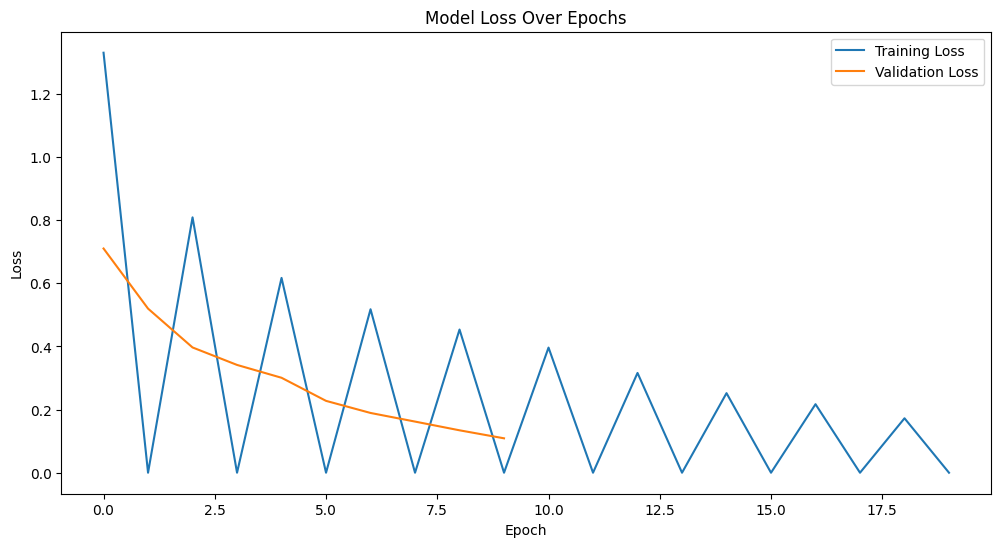

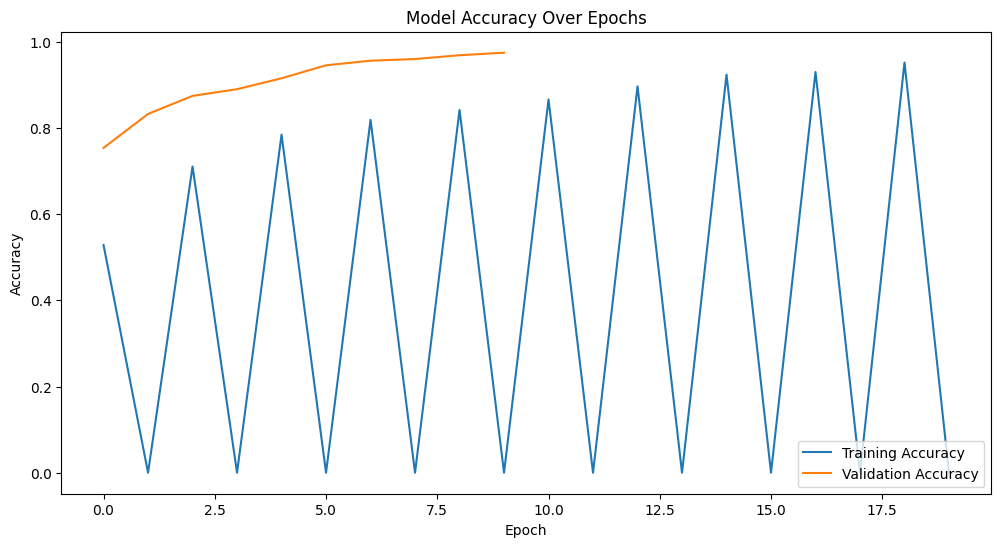

In [13]:
  # Plot loss for both phases
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'] + history_finetune.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot accuracy for both phases
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [14]:
model.save('teeth_disease_resnet50.h5')

In [16]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout



# You can also try increasing the batch size
train_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input).flow_from_directory(
    directory=r'C:\Users\hazem\OneDrive\Desktop\Computer vision\Week-1\Teeth_Dataset\Training', 
    target_size=(224, 224), 
    batch_size=32)

validation_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input).flow_from_directory(
    directory=r'C:\Users\hazem\OneDrive\Desktop\Computer vision\Week-1\Teeth_Dataset\Validation', 
    target_size=(224, 224), 
    batch_size=32)

# Example: adding dropout and L2 regularization to the fully connected layer
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x) # L2 regularization
x = Dropout(0.5)(x)  # Dropout layer
predictions = tf.keras.layers.Dense(7, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Adjust the learning rate and batch size
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_finetune = model.fit(train_batch, 
                             validation_data=validation_batch, 
                             epochs=10, 
                             steps_per_epoch=len(train_batch), 
                             validation_steps=len(validation_batch))


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Epoch 1/10


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.2016 - loss: 3.5998 - val_accuracy: 0.5642 - val_loss: 2.6093
Epoch 2/10


c:\Users\hazem\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.4540 - loss: 2.8414 - val_accuracy: 0.7198 - val_loss: 2.2744
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.6103 - loss: 2.4349 - val_accuracy: 0.7938 - val_loss: 2.0717
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7202 - loss: 2.1774 - val_accuracy: 0.8444 - val_loss: 1.9211
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.7910 - loss: 2.0039 - val_accuracy: 0.8872 - val_loss: 1.8144
Epoch 10/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


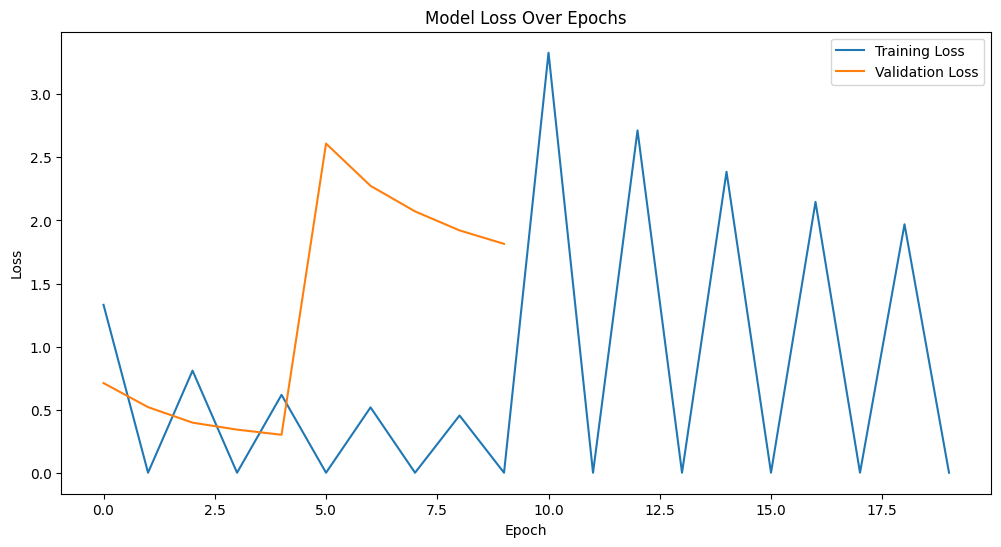

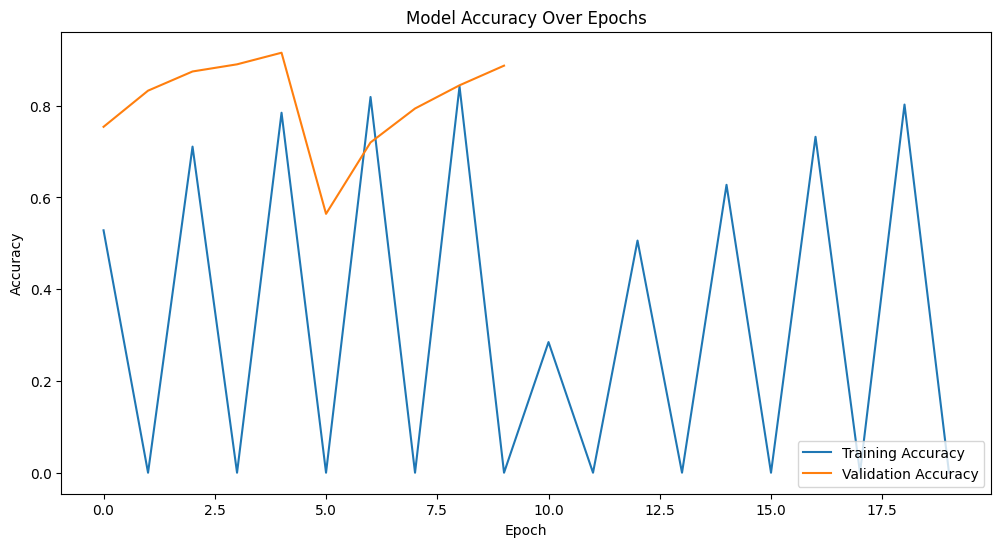

In [17]:
  # Plot loss for both phases
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'] + history_finetune.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot accuracy for both phases
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [18]:
# save the model 
model.save('teeth_disease_resnet50(2).h5')